In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
heart_df = pd.read_csv('/content/heart.csv')

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking for missing values
heart_df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Understanding the data
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking for missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

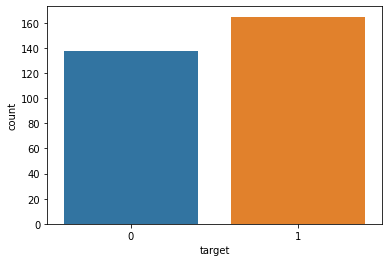

In [ ]:
# Exploreing the data
sns.countplot(x="target", data=heart_df)

<AxesSubplot:xlabel='target', ylabel='age'>

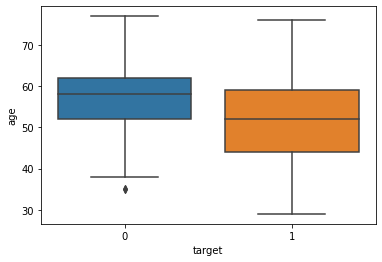

In [ ]:
sns.boxplot(x="target", y="age", data=heart_df)


<AxesSubplot:xlabel='target', ylabel='chol'>

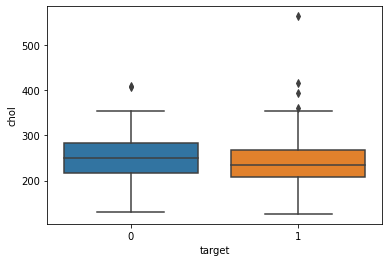

In [ ]:
sns.boxplot(x="target", y="chol", data=heart_df)


<AxesSubplot:xlabel='target', ylabel='chol'>

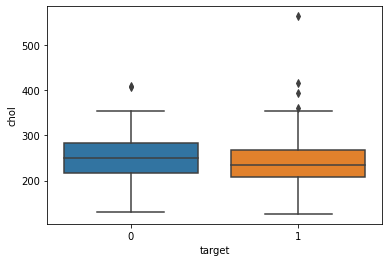

In [ ]:
sns.boxplot(x="target", y="chol", data=heart_df)


<AxesSubplot:xlabel='thalach', ylabel='oldpeak'>

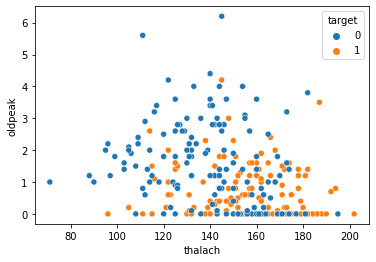

In [ ]:
sns.scatterplot(x="thalach", y="oldpeak", hue="target", data=heart_df)

<AxesSubplot:xlabel='age', ylabel='Count'>

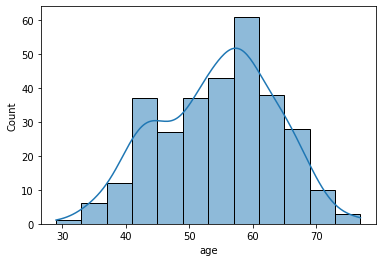

In [ ]:
# Checking the distribution of variables
sns.histplot(data=heart_df, x="age", kde=True)

<AxesSubplot:xlabel='chol', ylabel='Count'>

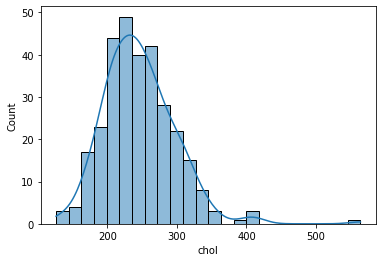

In [ ]:
sns.histplot(data=heart_df, x="chol", kde=True)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

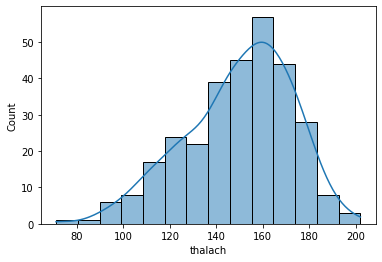

In [ ]:
sns.histplot(data=heart_df, x="thalach", kde=True)

<AxesSubplot:>

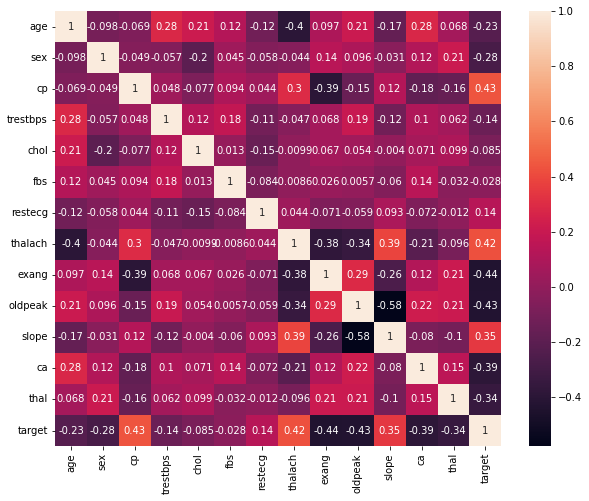

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

# Creating a correlation matrix
corr_matrix = heart_df.corr()
sns.heatmap(corr_matrix, annot=True)

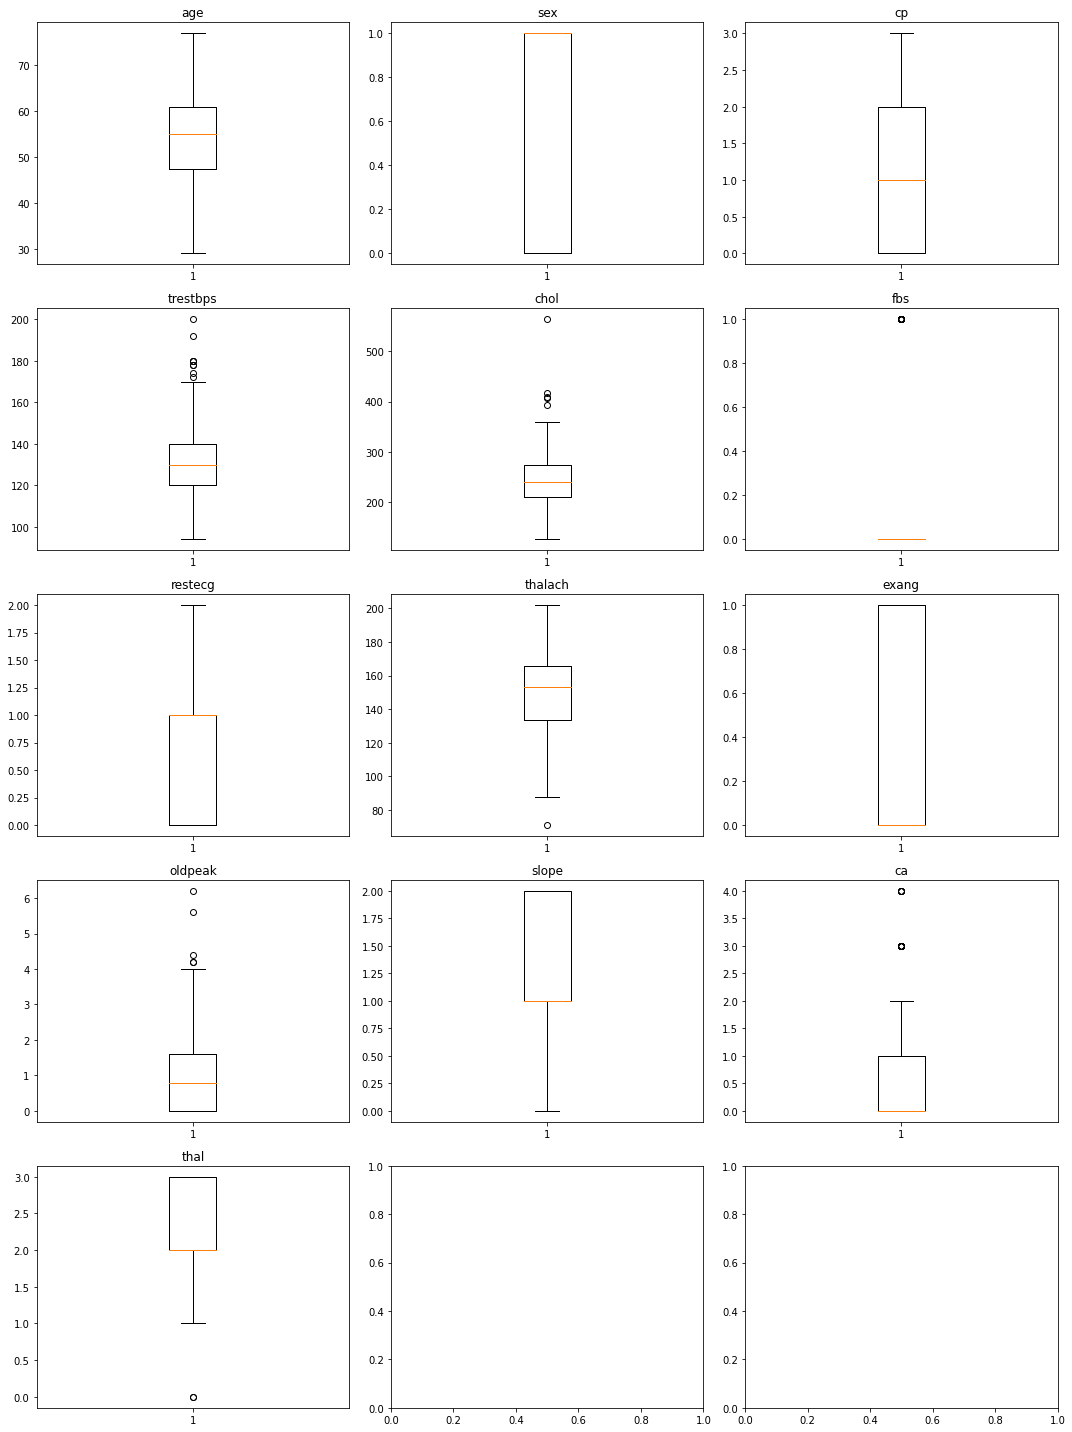

In [ ]:
# Plotting boxplots for all variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(heart_df.columns):
    if col != "target":
        axes[i].boxplot(heart_df[col])
        axes[i].set_title(col)
        
plt.tight_layout()
plt.show()

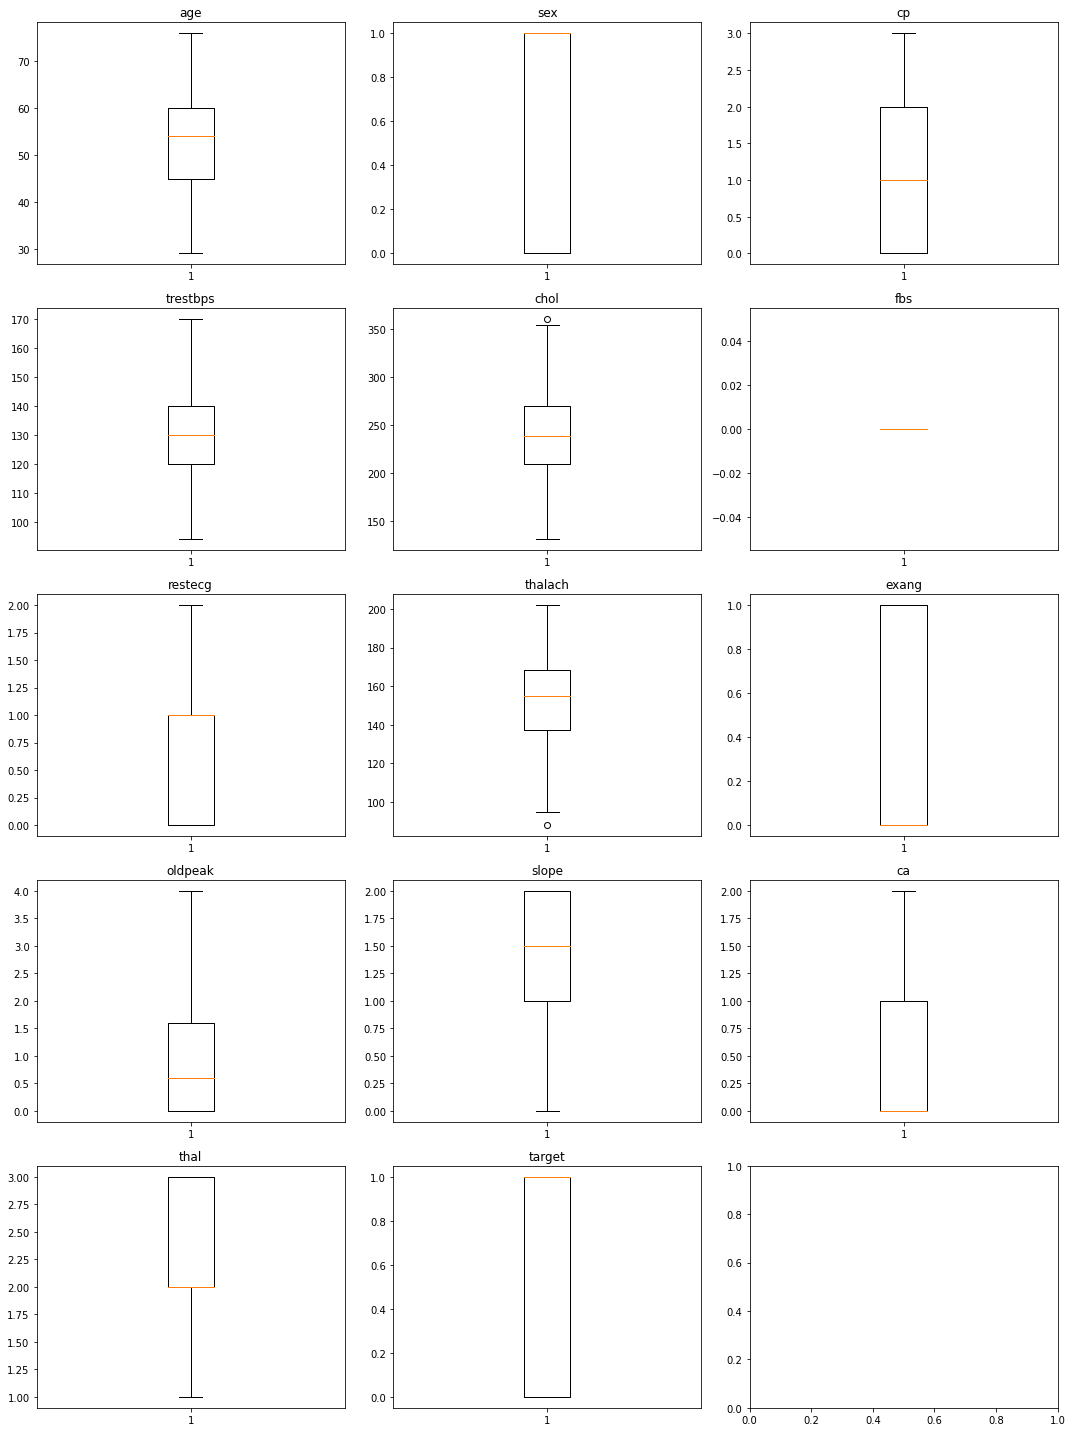

In [ ]:
from scipy.stats import zscore

# Removing outliers using Tukey method
for col in heart_df.columns:
    if col != "output":
        q1 = heart_df[col].quantile(0.25)
        q3 = heart_df[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        heart_df = heart_df[(heart_df[col] >= low) & (heart_df[col] <= high)]
        
# Plotting boxplots for all variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(heart_df.columns):
    if col != "output":
        axes[i].boxplot(heart_df[col])
        axes[i].set_title(col)
        
plt.tight_layout()
plt.show()

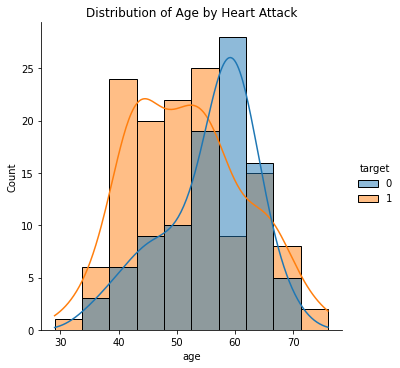

In [ ]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# plotting age distribution
sns.displot(data=heart_df, x="age", hue="target", kde=True)
plt.title("Distribution of Age by Heart Attack")
plt.show()


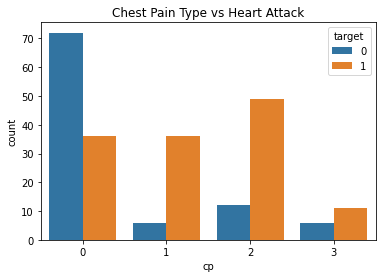

In [ ]:
# plotting chest pain type vs heart attack
sns.countplot(data=heart_df, x="cp", hue="target")
plt.title("Chest Pain Type vs Heart Attack")
plt.show()


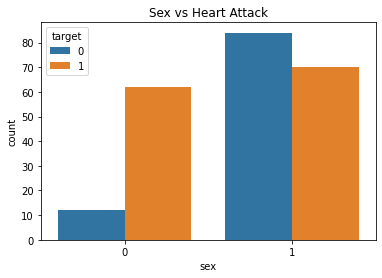

In [ ]:
# plotting sex vs heart attack
sns.countplot(data=heart_df, x="sex", hue="target")
plt.title("Sex vs Heart Attack")
plt.show()


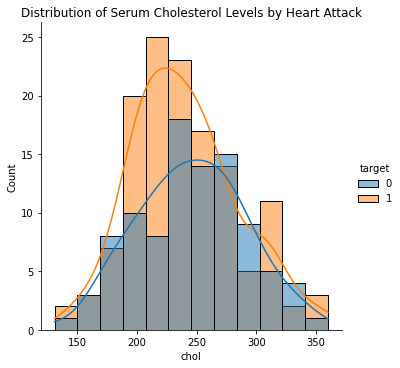

In [ ]:
# plotting serum cholesterol levels distribution
sns.displot(data=heart_df, x="chol", hue="target", kde=True)
plt.title("Distribution of Serum Cholesterol Levels by Heart Attack")
plt.show()



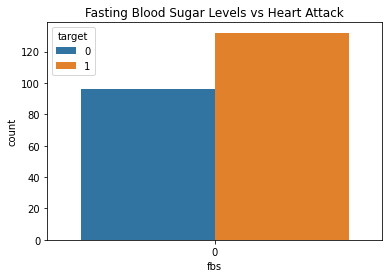

In [ ]:
# plotting fasting blood sugar levels vs heart attack
sns.countplot(data=heart_df, x="fbs", hue="target")
plt.title("Fasting Blood Sugar Levels vs Heart Attack")
plt.show()



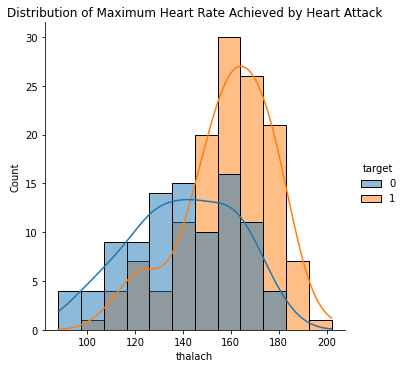

In [ ]:
# plotting maximum heart rate achieved distribution
sns.displot(data=heart_df, x="thalach", hue="target", kde=True)
plt.title("Distribution of Maximum Heart Rate Achieved by Heart Attack")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# performing t-tests for continuous variables
cont_vars = ['age', 'thalach', 'oldpeak']
for var in cont_vars:
    attack = heart_df[heart_df['target']==1][var]
    no_attack = heart_df[heart_df['target']==0][var]
    t, pval = ttest_ind(attack, no_attack)
    print(f"t-test for {var}: t-value = {t}, p-value = {pval}")

t-test for age: t-value = -3.3114971926707435, p-value = 0.0010802526573607109
t-test for thalach: t-value = 6.914597240898851, p-value = 4.752995206612745e-11
t-test for oldpeak: t-value = -7.349277738450256, p-value = 3.6093203578308817e-12


In [ ]:
# performing chi-squared tests for categorical variables
from scipy.stats import chi2_contingency

cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'slope']

# performing chi-squared tests and print the results
for var in cat_vars:
    crosstab = pd.crosstab(heart_df[var], heart_df['target'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f'Chi-squared test for {var}: p-value = {p:.4f}')

Chi-squared test for sex: p-value = 0.0000
Chi-squared test for cp: p-value = 0.0000
Chi-squared test for fbs: p-value = 1.0000
Chi-squared test for restecg: p-value = 0.1021
Chi-squared test for slope: p-value = 0.0000


In [ ]:
# will perform linear regression and maybe we can go further with other machine learning algos.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create a list of predictor variables and target variable
predictors = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_df[predictors], heart_df[target], test_size=0.2, random_state=45)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit a logistic regression model to the training set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# make predictions on the testing set

lr_pred = logreg.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [ ]:
# train decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

In [ ]:
# train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [ ]:
# train SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred)
svm_rec = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [ ]:
# print the evaluation metrics for each model
print('Logistic Regression:\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}\n'.format(lr_acc, lr_prec, lr_rec, lr_f1))

Logistic Regression:
Accuracy: 0.8695652173913043
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1 Score: 0.8695652173913043



In [ ]:
print('Decision Tree:\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}\n'.format(dt_acc, dt_prec, dt_rec, dt_f1))

Decision Tree:
Accuracy: 0.8260869565217391
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1 Score: 0.8333333333333333



In [ ]:
print('Random Forest:\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}\n'.format(rf_acc, rf_prec, rf_rec, rf_f1))

Random Forest:
Accuracy: 0.9130434782608695
Precision: 0.8461538461538461
Recall: 1.0
F1 Score: 0.9166666666666666



In [ ]:
print('SVM:\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}\n'.format(svm_acc, svm_prec, svm_rec, svm_f1))

SVM:
Accuracy: 0.8695652173913043
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1 Score: 0.875



In [ ]:
# check for overfitting

In [ ]:
from sklearn.model_selection import cross_validate

# define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [ ]:
# perform 5-fold cross-validation for each model
for name, model in models.items():
    scores = cross_validate(model,heart_df[predictors], heart_df[target], cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

    
    print(name)
    print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print('Precision: {:.3f} (+/- {:.3f})'.format(scores['test_precision'].mean(), scores['test_precision'].std() * 2))
    print('Recall: {:.3f} (+/- {:.3f})'.format(scores['test_recall'].mean(), scores['test_recall'].std() * 2))
    print('F1 score: {:.3f} (+/- {:.3f})'.format(scores['test_f1'].mean(), scores['test_f1'].std() * 2))
    print('')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression
Accuracy: 0.846 (+/- 0.063)
Precision: 0.849 (+/- 0.101)
Recall: 0.902 (+/- 0.124)
F1 score: 0.872 (+/- 0.049)

Decision Tree
Accuracy: 0.754 (+/- 0.132)
Precision: 0.814 (+/- 0.198)
Recall: 0.766 (+/- 0.097)
F1 score: 0.785 (+/- 0.096)

Random Forest
Accuracy: 0.815 (+/- 0.106)
Precision: 0.826 (+/- 0.151)
Recall: 0.879 (+/- 0.089)
F1 score: 0.848 (+/- 0.070)

SVM
Accuracy: 0.649 (+/- 0.054)
Precision: 0.631 (+/- 0.034)
Recall: 0.947 (+/- 0.079)
F1 score: 0.757 (+/- 0.039)

